In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing

In [6]:
train_dir = r'path_to_data\train'
validation_dir = r'path_to_data\validation'
test_dir =r'path_to_data\test'

## Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

Link : https://keras.io/preprocessing/image/

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [12]:
# keras.utils.plot_model(model,to_file='project_V01.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [8]:
from tensorflow.keras import optimizers

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']
              )

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50
                  )

Epoch 1/30
100/100 [==============================] - 23s 201ms/step - loss: 0.6957 - acc: 0.5149 - val_loss: 0.6728 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 17s 168ms/step - loss: 0.6594 - acc: 0.6294 - val_loss: 0.6420 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 16s 165ms/step - loss: 0.6172 - acc: 0.6709 - val_loss: 0.6261 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 17s 166ms/step - loss: 0.5811 - acc: 0.6987 - val_loss: 0.6279 - val_acc: 0.6430
Epoch 5/30
100/100 [==============================] - 17s 171ms/step - loss: 0.5596 - acc: 0.7177 - val_loss: 0.5819 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 18s 183ms/step - loss: 0.5151 - acc: 0.7386 - val_loss: 0.6040 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 17s 168ms/step - loss: 0.5062 - acc: 0.7424 - val_loss: 0.5758 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 1

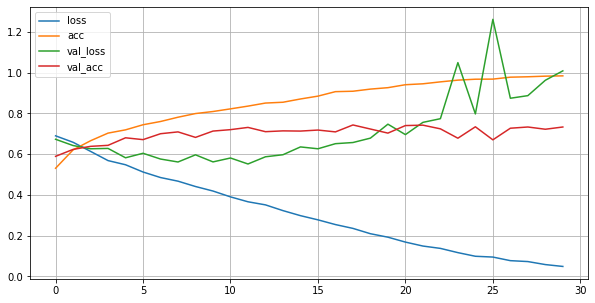

In [14]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

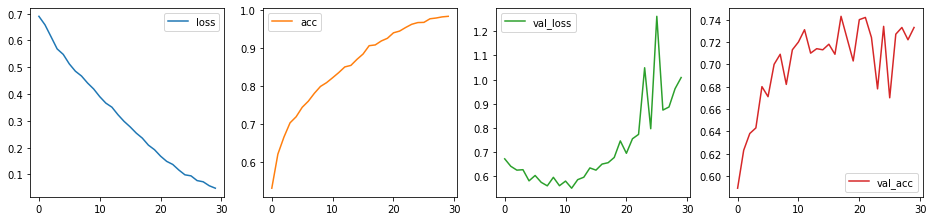

In [16]:
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(4, 4), subplots=True)
plt.show()

## Save & Load

In [17]:
model.save("project_V01.h5")

In [18]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### load

In [10]:
model = keras.models.load_model("project_V01.h5")

In [71]:
model.metrics_names

['loss', 'acc']

In [39]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [92]:
dog_file = 'path_to_data/test/dogs/dog.1503.jpg'
# dog_file = 'path_to_data/test/dogs/dog.1505.jpg'
# dog_file = 'path_to_data/test/cats/cat.1505.jpg'
dog_img = image.load_img(dog_file, target_size=(150, 150))
dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [93]:
dog_img.shape

(1, 150, 150, 3)

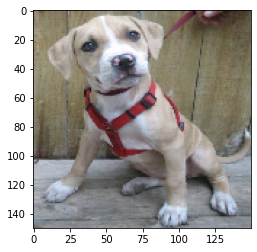

In [94]:
plt.imshow(dog_img[0])

In [95]:
prediction_classes =  model.predict_classes(dog_img)
prediction_classes

array([[1]])

In [96]:
prediction_prob = model.predict(dog_img)
prediction_prob

array([[0.9480354]], dtype=float32)

In [97]:
prediction_prob.round(2)

array([[0.95]], dtype=float32)

In [11]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
ev = model.evaluate(test_generator, steps=50)
ev

50/50 [==============================] - 6s 88ms/step - loss: 1.0012 - acc: 0.7160


[1.001227855682373, 0.7160000205039978]

# CNN With data augmentation (v02)

In [5]:

train_dir = r'path_to_data\train'
validation_dir = r'path_to_data\validation'
test_dir =r'path_to_data\test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
# keras.utils.plot_model(model,to_file='project_V02.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
# history = model.fit( train_generator,
#                      steps_per_epoch=100,
#                      epochs=100,
#                      validation_data=validation_generator,
#                      validation_steps=50
#                      )
history = model.fit( train_generator,
                     epochs=100,
                     validation_data=validation_generator
                    )

Epoch 1/100
63/63 [==============================] - 30s 435ms/step - loss: 0.7008 - acc: 0.4994 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/100
63/63 [==============================] - 23s 363ms/step - loss: 0.6947 - acc: 0.4947 - val_loss: 0.6842 - val_acc: 0.5030
Epoch 3/100
63/63 [==============================] - 40s 635ms/step - loss: 0.6895 - acc: 0.5433 - val_loss: 0.6841 - val_acc: 0.5360
Epoch 4/100
63/63 [==============================] - 28s 440ms/step - loss: 0.6786 - acc: 0.5695 - val_loss: 0.6527 - val_acc: 0.6150
Epoch 5/100
63/63 [==============================] - 37s 587ms/step - loss: 0.6820 - acc: 0.5639 - val_loss: 0.6484 - val_acc: 0.6250
Epoch 6/100
63/63 [==============================] - 29s 467ms/step - loss: 0.6537 - acc: 0.6244 - val_loss: 0.6319 - val_acc: 0.6420
Epoch 7/100
63/63 [==============================] - 27s 430ms/step - loss: 0.6548 - acc: 0.6135 - val_loss: 0.6305 - val_acc: 0.6440
Epoch 8/100
63/63 [==============================] - 24s 389ms

In [11]:
model.save("project_V02.h5")

In [50]:
model.metrics_names

['loss', 'acc']

In [47]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 63}

In [51]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

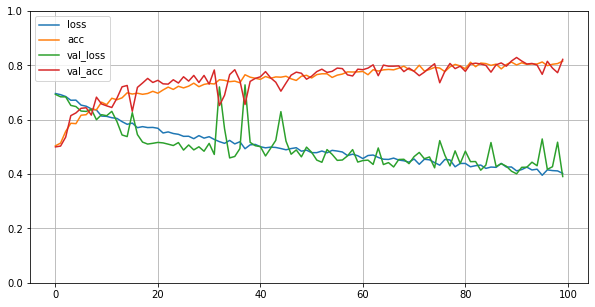

In [12]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

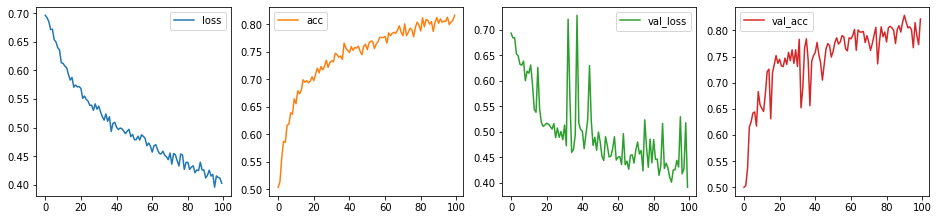

In [13]:
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(4, 4), subplots=True)
plt.show()

In [3]:
# keras.backend.clear_session
# del model

In [13]:
model = keras.models.load_model("project_V02.h5")

In [38]:
dog_file = 'path_to_data/test/dogs/dog.1503.jpg'
dog_file = 'path_to_data/test/dogs/dog.1505.jpg'
dog_file = 'path_to_data/test/cats/cat.1505.jpg'
dog_file = 'path_to_data/test/dogs/dog.1525.jpg'
dog_img = image.load_img(dog_file, target_size=(150, 150))
dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [39]:
dog_img.shape

(1, 150, 150, 3)

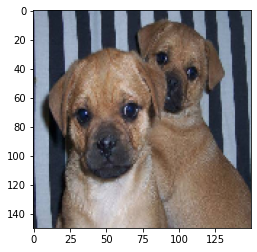

In [40]:
plt.imshow(dog_img[0])

In [41]:
prediction_classes =  model.predict_classes(dog_img)
prediction_classes

array([[1]])

In [42]:
prediction_prob = model.predict(dog_img)
prediction_prob

array([[0.9938957]], dtype=float32)

In [43]:
prediction_prob.round(2)

array([[0.99]], dtype=float32)

In [16]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [18]:
ev = model.evaluate(test_generator)
ev

32/32 [==============================] - 5s 141ms/step - loss: 0.4246 - acc: 0.8000


[0.42462158203125, 0.800000011920929]

# VGG16 (v03)

In [17]:

train_dir = r'path_to_data\train'
validation_dir = r'path_to_data\validation'
test_dir =r'path_to_data\test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image


In [6]:
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True
                                )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
# keras.utils.plot_model(conv_base, to_file='VGG_16.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [20]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
# keras.utils.plot_model(model, to_file='VGG_16_with_model.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [23]:
# keras.utils.plot_model(model,to_file='project_V03.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [21]:
conv_base.trainable = False

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [25]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")
# checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [23]:
# patience: Number of epochs with no improvement after which training will be stopped.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [26]:
history = model.fit(
                  train_generator,
                  steps_per_epoch=100,
                  epochs=30,
                  validation_data=validation_generator,
                  validation_steps=50,
                  callbacks=[checkpoint_cb]
                  )

Epoch 1/30
100/100 [==============================] - 59s 498ms/step - loss: 0.6974 - acc: 0.5803 - val_loss: 0.4692 - val_acc: 0.8340
Epoch 2/30
100/100 [==============================] - 31s 310ms/step - loss: 0.5134 - acc: 0.7503 - val_loss: 0.3735 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 31s 312ms/step - loss: 0.4602 - acc: 0.8007 - val_loss: 0.3293 - val_acc: 0.8620
Epoch 4/30
100/100 [==============================] - 32s 322ms/step - loss: 0.4285 - acc: 0.8030 - val_loss: 0.3089 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 33s 327ms/step - loss: 0.3869 - acc: 0.8337 - val_loss: 0.2935 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 34s 338ms/step - loss: 0.3745 - acc: 0.8430 - val_loss: 0.2802 - val_acc: 0.8820
Epoch 7/30
100/100 [==============================] - 30s 297ms/step - loss: 0.3721 - acc: 0.8258 - val_loss: 0.2710 - val_acc: 0.8840
Epoch 8/30
100/100 [==============================] - 3

In [27]:
model.save("project_V03.h5")

In [28]:
print(model.metrics_names)
print(history.params)
print(history.history.keys())

['loss', 'acc']
{'verbose': 1, 'epochs': 30, 'steps': 100}
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


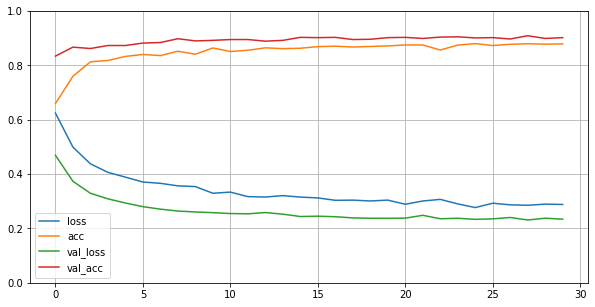

In [29]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

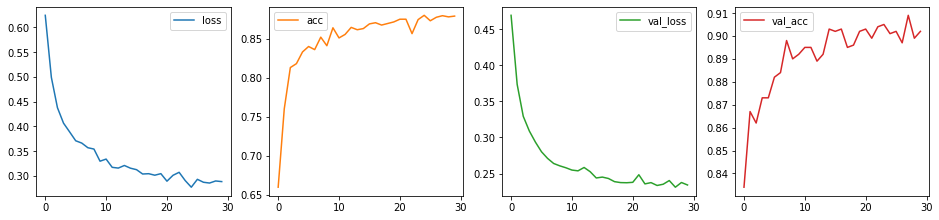

In [30]:
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(4, 4), subplots=True)
plt.show()

In [17]:
# hist_df = pd.DataFrame(history.history) 

In [18]:
# hist_csv_file = 'history.csv'
# with open(hist_csv_file, mode='w') as f:
#     hist_df.to_csv(f)

In [20]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
ev = model.evaluate(test_generator, steps=50)
ev

50/50 [==============================] - 10s 111ms/step - loss: 0.2461 - acc: 0.8950


[0.2461017370223999, 0.8949999809265137]

In [ ]:
# keras.backend.clear_session
# del model

In [19]:
model = keras.models.load_model("project_V03.h5")